In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/data01/AMPolyCalc/code')
from rw_utils import read_raw_data_1X, save_path
from recon import recon_slice, recon_binned
from void_mapping import void_map_gpu
from tomo_encoders.misc import viewer
from tomo_encoders.misc.voxel_processing import get_values_cyl_mask, cylindrical_mask
import cupy as cp
from skimage.filters import threshold_otsu

In [2]:
projs, theta, center, dark, flat = read_raw_data_1X("1", "1")
b = 4
from params import pixel_size_1X as pixel_size

In [3]:
from tomo_encoders.misc.voxel_processing import TimerGPU
timer = TimerGPU("secs")

In [4]:
V = recon_binned(projs, theta, center, dark, flat, b, pixel_size)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

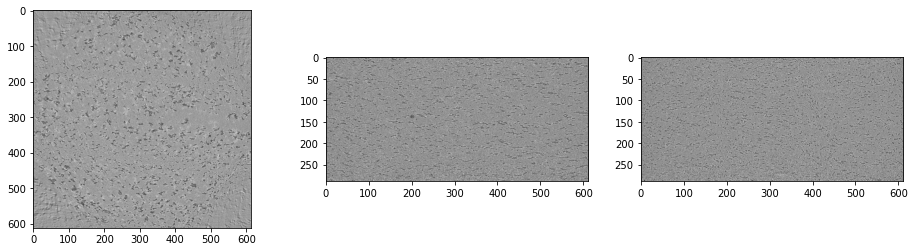

In [5]:
fig, ax = plt.subplots(1,3, figsize = (16,4))
viewer.view_midplanes(V.get(), ax = ax)

In [6]:
voxel_values = get_values_cyl_mask(V[::2,::2,::2], 1.0).get()
thresh = cp.float32(threshold_otsu(voxel_values))    
V[:] = (V<thresh).astype(cp.uint8)
cylindrical_mask(V, 1, mask_val = 1)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

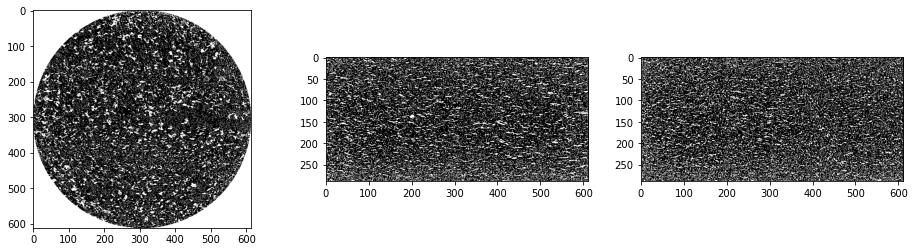

In [7]:
fig, ax = plt.subplots(1,3, figsize = (16,4))
viewer.view_midplanes(V.get(), ax = ax)

In [8]:
# voids_4 = void_map_gpu(projs, theta, center, dark, flat, b, pixel_size)